In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
dataset_name = 'horses_or_humans'  

(dataset_train, dataset_test), metadata = tfds.load(
    name=dataset_name,
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
)
# dataset_train, info =  tfds.load(name=dataset_name , split=tfds.Split.TRAIN, with_info=True)
# dataset_test, info =  tfds.load(name=dataset_name , split=tfds.Split.TEST, with_info=True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete72E3G2/horses_or_humans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete72E3G2/horses_or_humans-test.tfrecord


Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [2]:
IMG_SIZE = 224 
def preprocess(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [3]:
from tensorflow.keras.optimizers import RMSprop
def solution_model():
    train = dataset_train.map(preprocess)
    validation = dataset_test.map(preprocess)
    BATCH_SIZE = 32
    SHUFFLE_BUFFER_SIZE = 1000
    train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
    validation_batches = validation.batch(BATCH_SIZE)

    for image_batch, label_batch in train_batches.take(1):
      pass
    image_batch.shape

    IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

    # Create the base model from the pre-trained model MobileNet V2
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
    feature_batch = base_model(image_batch)
    base_model.trainable = False

    

    model = tf.keras.Sequential([
      base_model,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer = RMSprop(lr=0.0001), 
                  loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    history = model.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)
    # # Training model 
    # model.fit(train_dataset, validation_data=val_dataset, epochs=10)

    # model.summary()
    return history

In [4]:
history = solution_model()

9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/10
26/26 [==============================] - 33s 1s/step - loss: 0.4939 - accuracy: 0.7640 - val_loss: 0.3824 - val_accuracy: 0.8634
Epoch 2/10
26/26 [==============================] - 33s 1s/step - loss: 0.2889 - accuracy: 0.9319 - val_loss: 0.2356 - val_accuracy: 0.9610
Epoch 3/10
26/26 [==============================] - 33s 1s/step - loss: 0.1774 - accuracy: 0.9781 - val_loss: 0.1474 - val_accuracy: 0.9805
Epoch 4/10
26/26 [==============================] - 33s 1s/step - loss: 0.1126 - accuracy: 0.9903 - val_loss: 0.0952 - val_accuracy: 0.9951
Epoch 5/10
26/26 [==============================] - 33s 1s/step - loss: 0.0737 - accuracy: 0.9951 - val_loss: 0.0624 - val_accuracy: 0.9951
Epoch 6/10
26/26 [==============================] - 33s 1s/step - loss: 0.0501 - accuracy: 0.9976 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 33s 1s/step - loss: 0.0359 - accuracy: 0.9976

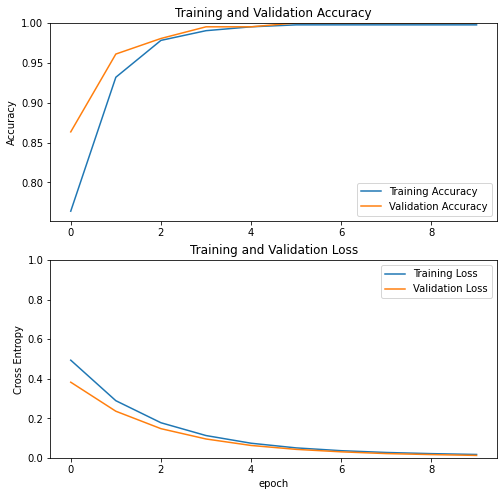

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()